<a href="https://colab.research.google.com/github/gabriellemacinnes/Clothing-Identifier/blob/main/Clothing_Identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# import statements
import sys
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from matplotlib import pyplot as plt

In [9]:
DO_LOG = False

# training of dataset
labels = pd.read_csv('data/train_labels.csv')  # read labels
train_images = np.load('data/train_images.npy') # load train images
del labels["ID"]
train_images = np.expand_dims(train_images, axis=3)

# mapping
label_mapping = pd.read_csv('data/label_int_to_str_mapping.csv')  # read label mapping
train_images.shape

(50000, 28, 28, 1)

In [10]:
# testing part of dataset
sample_submission = pd.read_csv('data/sample_submission.csv') # read sample_submission
test_images = np.load('data/test_images.npy') # load test images

# Normalize the data
train_images_norm = train_images / 255
test_images_norm = test_images / 255


if (DO_LOG):
    """
    {labels.shape = }
    {train_images.shape= }
    {label_mapping.shape= }
    {sample_submission.shape= }
    {test_images.shape= }
    Before normalization:
    {train_images[0,0:5,0:5]}
    After normalization:
    {train_images_norm[0,0:5,0:5]}
    """
    

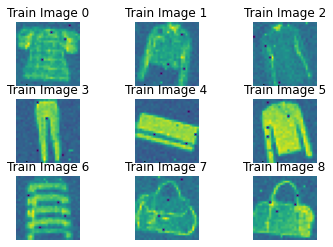

In [11]:
# plot the first 9 images
f, axarr = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        axarr[i, j].imshow(train_images[i*3+j].reshape(28, 28))
        axarr[i, j].set_title(f"Train Image {i*3+j}")
        axarr[i, j].axis('off')

plt.show()

In [12]:
def define_model():
    """
    This function defines the CNN model.
    """
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, train_images, train_labels, label_mapping):
    """
    This function trains the model.
    """
    # train the model
    model.fit(train_images, train_labels, epochs=5)

    # evaluate the model
    scores = model.evaluate(train_images, train_labels)
    print(f"\n{model.metrics_names[1]}: {scores[1]*100}%")

    # save the model
    model.save('model.h5')



In [13]:
def main():
    """
    This function is the main function.
    """
    # define the model
    model = define_model()
    # train the model
    train_model(model, train_images_norm, labels.values, label_mapping)
    
    # evaluate the model
    scores = model.evaluate(train_images_norm, labels.values)
    print(f"\n{model.metrics_names[1]}: {scores[1]*100}%")

    # predict the test set
    predictions = model.predict(test_images_norm).argmax(axis = 1)

    # create the submission file
    submission = pd.DataFrame()  
    submission['ID'] = np.arange(len(predictions))
    submission['label'] = predictions
    submission.to_csv('submission.csv', index=False)

if __name__ == "__main__":
    main()

Epoch 1/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6516 - accuracy: 0.7626
Epoch 2/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.4727 - accuracy: 0.8271
Epoch 3/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.4186 - accuracy: 0.8488
Epoch 4/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3826 - accuracy: 0.8602
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3136 - accuracy: 0.8860

accuracy: 88.60200047492981%
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3136 - accuracy: 0.8860

accuracy: 88.60200047492981%


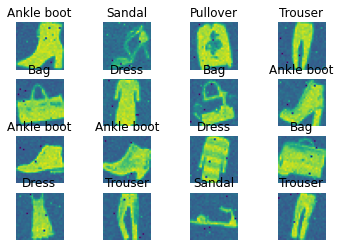

In [14]:
# plot the first 9 images of the testing set
f, axarr = plt.subplots(4, 4)
submission = pd.read_csv('submission.csv')

for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(test_images[i*4+j].reshape(28, 28))
        ID = submission['label'].tolist()[i*4+j]
        axarr[i, j].set_title(f"{label_mapping['str_label'].tolist()[ID]}")
        axarr[i, j].axis('off')
